# Generate Point Sources on the Sphere

In [18]:
import numpy as np
from cached_property import cached_property
import copy
from astropy import units as un
from scipy.integrate import quad
from scipy.interpolate import InterpolatedUnivariateSpline
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def randsphere(n, theta_range = (0,np.pi), phi_range = (0,2*np.pi)):
    """
    Generate random angular theta, phi points on the sphere


    Parameters
    ----------
    n: integer
        The number of randoms to generate

    Returns
    -------
    theta,phi: tuple of arrays
    """
    phi = np.random.random(n)
    phi = phi*(phi_range[1]-phi_range[0]) + phi_range[0]

    cos_theta_min=np.cos(theta_range[0])
    cos_theta_max=np.cos(theta_range[1])

    v = np.random.random(n)
    v *= (cos_theta_max-cos_theta_min)
    v += cos_theta_min

    theta = np.arccos(v)

    return theta, phi


In [39]:
def dnds_franzen(s, a, norm=False):
    out = 10**(sum(np.log10(s)**i * aa for i, aa in enumerate(a)))
    if norm:
        return out
    else:
        return s**-2.5 * out

In [34]:
a_franzen = [3.52, 0.307, -0.388, -0.0404, 0.0351, 0.00600]

In [35]:
s = np.logspace(-6, 2, 200)

In [47]:
def intg(s):
    return dnds_franzen(s, a_franzen)

In [111]:
s = np.logspace(2, -3, 750)
density = [0]
for i, x in enumerate(s[1:], start=1):
    density.append(quad(intg, x, s[i-1])[0] + density[i-1])
    
density = np.array(density)

Text(0, 0.5, 'N Sources')

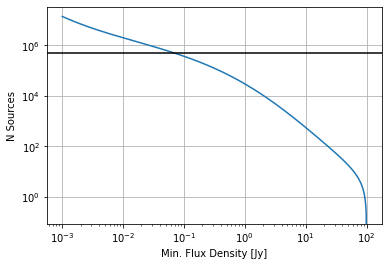

In [124]:
plt.plot(s, 4*np.pi*density)
plt.xscale('log')
plt.yscale('log')
plt.axhline(5e5, color='k')
plt.grid(True)
plt.xlabel("Min. Flux Density [Jy]")
plt.ylabel("N Sources")

In [114]:
def cum_flux_intg(s):
    return s*dnds_franzen(s, a_franzen)

s = np.logspace(2, -3, 750)
cum_flux = [0]
for i, x in enumerate(s[1:], start=1):
    cum_flux.append(quad(cum_flux_intg, x, s[i-1])[0] + cum_flux[i-1])
    
cum_flux = np.array(cum_flux)

Text(0, 0.5, '% of Flux Accounted')

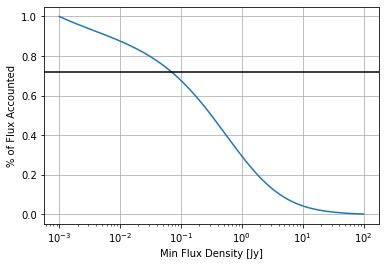

In [123]:
plt.plot(s, cum_flux / cum_flux.max())
plt.xscale('log')
plt.grid(True)
plt.axhline((cum_flux / cum_flux.max())[np.argwhere(4*np.pi*density>5e5)[0]], color='k')
plt.xlabel("Min Flux Density [Jy]")
plt.ylabel("% of Flux Accounted")

In [93]:
cdf = np.array(cdf).copy()
cdf /= cdf.max()

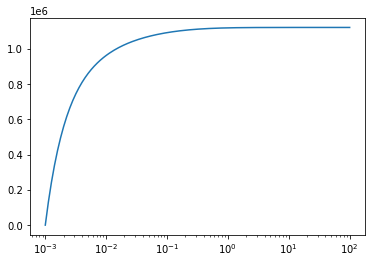

In [54]:
plt.plot(np.logspace(-3, 2, 200), cdf)
plt.xscale('log')

In [57]:
spl = InterpolatedUnivariateSpline(np.array(cdf)/cdf[-1], np.logspace(-3, 2, 200))

In [138]:
size = np.random.poisson(4*np.pi*density.max())
print(size)

In [147]:
flux_density = spl(np.random.uniform(size=size))

In [148]:
flux_density = np.sort(flux_density)

In [142]:
theta, phi = randsphere(size)

In [144]:
spec_index = np.random.normal(loc=0.8, scale=0.05, size=size)

In [152]:
np.savez('/home/steven/Desktop/gleam_like_brighter.npz', flux_density=flux_density[-200000:], theta=theta[-200000:], phi=phi[-200000:], spec_index=spec_index[-200000:])
np.savez('/home/steven/Desktop/gleam_like_fainter.npz', flux_density=flux_density[:-200000], theta=theta[:-200000], phi=phi[:-200000], spec_index=spec_index[:-200000])

In [70]:
bins = np.logspace(-3, 2, 100)

In [157]:
dnds = dnds_franzen(bins, a_franzen, norm=False)

In [158]:
c, b = np.histogram(flux_density, bins=bins)

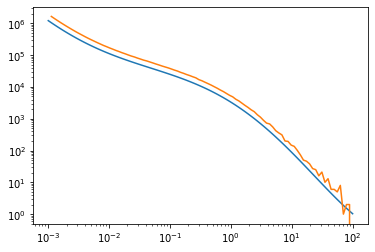

In [159]:
plt.plot(bins, bins* dnds)
plt.plot(b[1:], c)
plt.xscale('log')
plt.yscale('log')
#plt.xlim(1e-6, 1e2)
#plt.ylim(1e-1, 1e4)